## import modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(123)
torch.manual_seed(123)

## define model architecture

In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 is basically 12 X 12 X 32
        self.fc2 = nn.Linear(64, 10)
 
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op

## define training and inference routines

In [4]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y) # nll is the negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                epoch, b_i * len(X), len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader), loss.item()))

In [5]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()  # loss summed across the batch
            pred = pred_prob.argmax(dim=1, keepdim=True)  # us argmax to get the most likely prediction
            success += pred.eq(y.view_as(pred)).sum().item()

    loss /= len(test_dataloader.dataset)

    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, success, len(test_dataloader.dataset),
        100. * success / len(test_dataloader.dataset)))


## create data loaders

In [6]:
# The mean and standard deviation values are calculated as the mean of all pixel values of all images in the training dataset
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
    batch_size=32, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,)) 
                   ])),
    batch_size=500, shuffle=True)

## define optimizer and run training epochs

In [7]:
device = torch.device("cpu")

model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

## model training

In [8]:
for epoch in range(1, 20):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

epoch: 1 [0/60000 (0%)]	 training loss: 2.324445
epoch: 1 [320/60000 (1%)]	 training loss: 1.727462
epoch: 1 [640/60000 (1%)]	 training loss: 1.428922
epoch: 1 [960/60000 (2%)]	 training loss: 0.717944
epoch: 1 [1280/60000 (2%)]	 training loss: 0.572199
epoch: 1 [1600/60000 (3%)]	 training loss: 0.847963
epoch: 1 [1920/60000 (3%)]	 training loss: 0.542137
epoch: 1 [2240/60000 (4%)]	 training loss: 0.384015
epoch: 1 [2560/60000 (4%)]	 training loss: 0.228308
epoch: 1 [2880/60000 (5%)]	 training loss: 0.645798
epoch: 1 [3200/60000 (5%)]	 training loss: 0.228496
epoch: 1 [3520/60000 (6%)]	 training loss: 0.163134
epoch: 1 [3840/60000 (6%)]	 training loss: 0.362703
epoch: 1 [4160/60000 (7%)]	 training loss: 0.564533
epoch: 1 [4480/60000 (7%)]	 training loss: 0.438789
epoch: 1 [4800/60000 (8%)]	 training loss: 0.337578
epoch: 1 [5120/60000 (9%)]	 training loss: 0.147629
epoch: 1 [5440/60000 (9%)]	 training loss: 0.138111
epoch: 1 [5760/60000 (10%)]	 training loss: 0.365426
epoch: 1 [6080/60

epoch: 1 [48960/60000 (82%)]	 training loss: 0.019394
epoch: 1 [49280/60000 (82%)]	 training loss: 0.187325
epoch: 1 [49600/60000 (83%)]	 training loss: 0.038311
epoch: 1 [49920/60000 (83%)]	 training loss: 0.034758
epoch: 1 [50240/60000 (84%)]	 training loss: 0.039249
epoch: 1 [50560/60000 (84%)]	 training loss: 0.079248
epoch: 1 [50880/60000 (85%)]	 training loss: 0.051400
epoch: 1 [51200/60000 (85%)]	 training loss: 0.162171
epoch: 1 [51520/60000 (86%)]	 training loss: 0.229157
epoch: 1 [51840/60000 (86%)]	 training loss: 0.147724
epoch: 1 [52160/60000 (87%)]	 training loss: 0.060992
epoch: 1 [52480/60000 (87%)]	 training loss: 0.125837
epoch: 1 [52800/60000 (88%)]	 training loss: 0.227963
epoch: 1 [53120/60000 (89%)]	 training loss: 0.009805
epoch: 1 [53440/60000 (89%)]	 training loss: 0.002539
epoch: 1 [53760/60000 (90%)]	 training loss: 0.032409
epoch: 1 [54080/60000 (90%)]	 training loss: 0.038749
epoch: 1 [54400/60000 (91%)]	 training loss: 0.015961
epoch: 1 [54720/60000 (91%)]

epoch: 2 [37440/60000 (62%)]	 training loss: 0.036920
epoch: 2 [37760/60000 (63%)]	 training loss: 0.077472
epoch: 2 [38080/60000 (63%)]	 training loss: 0.134896
epoch: 2 [38400/60000 (64%)]	 training loss: 0.005788
epoch: 2 [38720/60000 (65%)]	 training loss: 0.068943
epoch: 2 [39040/60000 (65%)]	 training loss: 0.081437
epoch: 2 [39360/60000 (66%)]	 training loss: 0.007516
epoch: 2 [39680/60000 (66%)]	 training loss: 0.080189
epoch: 2 [40000/60000 (67%)]	 training loss: 0.002070
epoch: 2 [40320/60000 (67%)]	 training loss: 0.098127
epoch: 2 [40640/60000 (68%)]	 training loss: 0.028956
epoch: 2 [40960/60000 (68%)]	 training loss: 0.018094
epoch: 2 [41280/60000 (69%)]	 training loss: 0.003738
epoch: 2 [41600/60000 (69%)]	 training loss: 0.016676
epoch: 2 [41920/60000 (70%)]	 training loss: 0.026290
epoch: 2 [42240/60000 (70%)]	 training loss: 0.125815
epoch: 2 [42560/60000 (71%)]	 training loss: 0.238040
epoch: 2 [42880/60000 (71%)]	 training loss: 0.104155
epoch: 2 [43200/60000 (72%)]

epoch: 3 [25920/60000 (43%)]	 training loss: 0.021503
epoch: 3 [26240/60000 (44%)]	 training loss: 0.097679
epoch: 3 [26560/60000 (44%)]	 training loss: 0.053034
epoch: 3 [26880/60000 (45%)]	 training loss: 0.020304
epoch: 3 [27200/60000 (45%)]	 training loss: 0.166495
epoch: 3 [27520/60000 (46%)]	 training loss: 0.006343
epoch: 3 [27840/60000 (46%)]	 training loss: 0.006085
epoch: 3 [28160/60000 (47%)]	 training loss: 0.042773
epoch: 3 [28480/60000 (47%)]	 training loss: 0.018266
epoch: 3 [28800/60000 (48%)]	 training loss: 0.007297
epoch: 3 [29120/60000 (49%)]	 training loss: 0.076372
epoch: 3 [29440/60000 (49%)]	 training loss: 0.003285
epoch: 3 [29760/60000 (50%)]	 training loss: 0.008646
epoch: 3 [30080/60000 (50%)]	 training loss: 0.115879
epoch: 3 [30400/60000 (51%)]	 training loss: 0.027911
epoch: 3 [30720/60000 (51%)]	 training loss: 0.032725
epoch: 3 [31040/60000 (52%)]	 training loss: 0.006361
epoch: 3 [31360/60000 (52%)]	 training loss: 0.019331
epoch: 3 [31680/60000 (53%)]

epoch: 4 [14400/60000 (24%)]	 training loss: 0.011734
epoch: 4 [14720/60000 (25%)]	 training loss: 0.001433
epoch: 4 [15040/60000 (25%)]	 training loss: 0.042009
epoch: 4 [15360/60000 (26%)]	 training loss: 0.001167
epoch: 4 [15680/60000 (26%)]	 training loss: 0.007411
epoch: 4 [16000/60000 (27%)]	 training loss: 0.176279
epoch: 4 [16320/60000 (27%)]	 training loss: 0.119038
epoch: 4 [16640/60000 (28%)]	 training loss: 0.001750
epoch: 4 [16960/60000 (28%)]	 training loss: 0.002272
epoch: 4 [17280/60000 (29%)]	 training loss: 0.111455
epoch: 4 [17600/60000 (29%)]	 training loss: 0.020838
epoch: 4 [17920/60000 (30%)]	 training loss: 0.047867
epoch: 4 [18240/60000 (30%)]	 training loss: 0.007386
epoch: 4 [18560/60000 (31%)]	 training loss: 0.002484
epoch: 4 [18880/60000 (31%)]	 training loss: 0.004090
epoch: 4 [19200/60000 (32%)]	 training loss: 0.004576
epoch: 4 [19520/60000 (33%)]	 training loss: 0.020260
epoch: 4 [19840/60000 (33%)]	 training loss: 0.002878
epoch: 4 [20160/60000 (34%)]

epoch: 5 [2560/60000 (4%)]	 training loss: 0.000581
epoch: 5 [2880/60000 (5%)]	 training loss: 0.006715
epoch: 5 [3200/60000 (5%)]	 training loss: 0.003614
epoch: 5 [3520/60000 (6%)]	 training loss: 0.030546
epoch: 5 [3840/60000 (6%)]	 training loss: 0.040006
epoch: 5 [4160/60000 (7%)]	 training loss: 0.018933
epoch: 5 [4480/60000 (7%)]	 training loss: 0.005410
epoch: 5 [4800/60000 (8%)]	 training loss: 0.062363
epoch: 5 [5120/60000 (9%)]	 training loss: 0.005770
epoch: 5 [5440/60000 (9%)]	 training loss: 0.025936
epoch: 5 [5760/60000 (10%)]	 training loss: 0.038276
epoch: 5 [6080/60000 (10%)]	 training loss: 0.024754
epoch: 5 [6400/60000 (11%)]	 training loss: 0.017555
epoch: 5 [6720/60000 (11%)]	 training loss: 0.003855
epoch: 5 [7040/60000 (12%)]	 training loss: 0.004632
epoch: 5 [7360/60000 (12%)]	 training loss: 0.115628
epoch: 5 [7680/60000 (13%)]	 training loss: 0.490891
epoch: 5 [8000/60000 (13%)]	 training loss: 0.000761
epoch: 5 [8320/60000 (14%)]	 training loss: 0.019319
epo

epoch: 5 [51520/60000 (86%)]	 training loss: 0.002790
epoch: 5 [51840/60000 (86%)]	 training loss: 0.001269
epoch: 5 [52160/60000 (87%)]	 training loss: 0.108304
epoch: 5 [52480/60000 (87%)]	 training loss: 0.042755
epoch: 5 [52800/60000 (88%)]	 training loss: 0.055161
epoch: 5 [53120/60000 (89%)]	 training loss: 0.018383
epoch: 5 [53440/60000 (89%)]	 training loss: 0.047648
epoch: 5 [53760/60000 (90%)]	 training loss: 0.003690
epoch: 5 [54080/60000 (90%)]	 training loss: 0.118251
epoch: 5 [54400/60000 (91%)]	 training loss: 0.033978
epoch: 5 [54720/60000 (91%)]	 training loss: 0.005687
epoch: 5 [55040/60000 (92%)]	 training loss: 0.001541
epoch: 5 [55360/60000 (92%)]	 training loss: 0.014180
epoch: 5 [55680/60000 (93%)]	 training loss: 0.092758
epoch: 5 [56000/60000 (93%)]	 training loss: 0.043715
epoch: 5 [56320/60000 (94%)]	 training loss: 0.021230
epoch: 5 [56640/60000 (94%)]	 training loss: 0.002472
epoch: 5 [56960/60000 (95%)]	 training loss: 0.005075
epoch: 5 [57280/60000 (95%)]

epoch: 6 [40000/60000 (67%)]	 training loss: 0.000037
epoch: 6 [40320/60000 (67%)]	 training loss: 0.003416
epoch: 6 [40640/60000 (68%)]	 training loss: 0.002653
epoch: 6 [40960/60000 (68%)]	 training loss: 0.017554
epoch: 6 [41280/60000 (69%)]	 training loss: 0.001790
epoch: 6 [41600/60000 (69%)]	 training loss: 0.054449
epoch: 6 [41920/60000 (70%)]	 training loss: 0.077256
epoch: 6 [42240/60000 (70%)]	 training loss: 0.001251
epoch: 6 [42560/60000 (71%)]	 training loss: 0.007798
epoch: 6 [42880/60000 (71%)]	 training loss: 0.066735
epoch: 6 [43200/60000 (72%)]	 training loss: 0.000833
epoch: 6 [43520/60000 (73%)]	 training loss: 0.001176
epoch: 6 [43840/60000 (73%)]	 training loss: 0.084820
epoch: 6 [44160/60000 (74%)]	 training loss: 0.027561
epoch: 6 [44480/60000 (74%)]	 training loss: 0.032898
epoch: 6 [44800/60000 (75%)]	 training loss: 0.008467
epoch: 6 [45120/60000 (75%)]	 training loss: 0.035253
epoch: 6 [45440/60000 (76%)]	 training loss: 0.033659
epoch: 6 [45760/60000 (76%)]

epoch: 7 [28480/60000 (47%)]	 training loss: 0.132422
epoch: 7 [28800/60000 (48%)]	 training loss: 0.012652
epoch: 7 [29120/60000 (49%)]	 training loss: 0.001845
epoch: 7 [29440/60000 (49%)]	 training loss: 0.387857
epoch: 7 [29760/60000 (50%)]	 training loss: 0.005290
epoch: 7 [30080/60000 (50%)]	 training loss: 0.039206
epoch: 7 [30400/60000 (51%)]	 training loss: 0.001702
epoch: 7 [30720/60000 (51%)]	 training loss: 0.003981
epoch: 7 [31040/60000 (52%)]	 training loss: 0.061687
epoch: 7 [31360/60000 (52%)]	 training loss: 0.031186
epoch: 7 [31680/60000 (53%)]	 training loss: 0.001579
epoch: 7 [32000/60000 (53%)]	 training loss: 0.000328
epoch: 7 [32320/60000 (54%)]	 training loss: 0.001270
epoch: 7 [32640/60000 (54%)]	 training loss: 0.062429
epoch: 7 [32960/60000 (55%)]	 training loss: 0.001480
epoch: 7 [33280/60000 (55%)]	 training loss: 0.000701
epoch: 7 [33600/60000 (56%)]	 training loss: 0.000226
epoch: 7 [33920/60000 (57%)]	 training loss: 0.000942
epoch: 7 [34240/60000 (57%)]

epoch: 8 [16960/60000 (28%)]	 training loss: 0.230575
epoch: 8 [17280/60000 (29%)]	 training loss: 0.047843
epoch: 8 [17600/60000 (29%)]	 training loss: 0.077518
epoch: 8 [17920/60000 (30%)]	 training loss: 0.000045
epoch: 8 [18240/60000 (30%)]	 training loss: 0.008665
epoch: 8 [18560/60000 (31%)]	 training loss: 0.015173
epoch: 8 [18880/60000 (31%)]	 training loss: 0.001064
epoch: 8 [19200/60000 (32%)]	 training loss: 0.001941
epoch: 8 [19520/60000 (33%)]	 training loss: 0.000567
epoch: 8 [19840/60000 (33%)]	 training loss: 0.071398
epoch: 8 [20160/60000 (34%)]	 training loss: 0.005542
epoch: 8 [20480/60000 (34%)]	 training loss: 0.002950
epoch: 8 [20800/60000 (35%)]	 training loss: 0.000274
epoch: 8 [21120/60000 (35%)]	 training loss: 0.110373
epoch: 8 [21440/60000 (36%)]	 training loss: 0.076120
epoch: 8 [21760/60000 (36%)]	 training loss: 0.000736
epoch: 8 [22080/60000 (37%)]	 training loss: 0.000653
epoch: 8 [22400/60000 (37%)]	 training loss: 0.002018
epoch: 8 [22720/60000 (38%)]

epoch: 9 [5440/60000 (9%)]	 training loss: 0.000716
epoch: 9 [5760/60000 (10%)]	 training loss: 0.015976
epoch: 9 [6080/60000 (10%)]	 training loss: 0.000487
epoch: 9 [6400/60000 (11%)]	 training loss: 0.013870
epoch: 9 [6720/60000 (11%)]	 training loss: 0.031214
epoch: 9 [7040/60000 (12%)]	 training loss: 0.028990
epoch: 9 [7360/60000 (12%)]	 training loss: 0.005884
epoch: 9 [7680/60000 (13%)]	 training loss: 0.002003
epoch: 9 [8000/60000 (13%)]	 training loss: 0.037963
epoch: 9 [8320/60000 (14%)]	 training loss: 0.001370
epoch: 9 [8640/60000 (14%)]	 training loss: 0.008793
epoch: 9 [8960/60000 (15%)]	 training loss: 0.029197
epoch: 9 [9280/60000 (15%)]	 training loss: 0.010197
epoch: 9 [9600/60000 (16%)]	 training loss: 0.068738
epoch: 9 [9920/60000 (17%)]	 training loss: 0.099905
epoch: 9 [10240/60000 (17%)]	 training loss: 0.003335
epoch: 9 [10560/60000 (18%)]	 training loss: 0.001287
epoch: 9 [10880/60000 (18%)]	 training loss: 0.002020
epoch: 9 [11200/60000 (19%)]	 training loss:

epoch: 9 [54400/60000 (91%)]	 training loss: 0.001804
epoch: 9 [54720/60000 (91%)]	 training loss: 0.413482
epoch: 9 [55040/60000 (92%)]	 training loss: 0.001748
epoch: 9 [55360/60000 (92%)]	 training loss: 0.001180
epoch: 9 [55680/60000 (93%)]	 training loss: 0.000795
epoch: 9 [56000/60000 (93%)]	 training loss: 0.017700
epoch: 9 [56320/60000 (94%)]	 training loss: 0.058994
epoch: 9 [56640/60000 (94%)]	 training loss: 0.039552
epoch: 9 [56960/60000 (95%)]	 training loss: 0.000387
epoch: 9 [57280/60000 (95%)]	 training loss: 0.005814
epoch: 9 [57600/60000 (96%)]	 training loss: 0.009179
epoch: 9 [57920/60000 (97%)]	 training loss: 0.012260
epoch: 9 [58240/60000 (97%)]	 training loss: 0.000373
epoch: 9 [58560/60000 (98%)]	 training loss: 0.319906
epoch: 9 [58880/60000 (98%)]	 training loss: 0.476627
epoch: 9 [59200/60000 (99%)]	 training loss: 0.006612
epoch: 9 [59520/60000 (99%)]	 training loss: 0.003953
epoch: 9 [59840/60000 (100%)]	 training loss: 0.004593

Test dataset: Overall Loss

epoch: 10 [41920/60000 (70%)]	 training loss: 0.004206
epoch: 10 [42240/60000 (70%)]	 training loss: 0.000332
epoch: 10 [42560/60000 (71%)]	 training loss: 0.011507
epoch: 10 [42880/60000 (71%)]	 training loss: 0.021877
epoch: 10 [43200/60000 (72%)]	 training loss: 0.011267
epoch: 10 [43520/60000 (73%)]	 training loss: 0.000143
epoch: 10 [43840/60000 (73%)]	 training loss: 0.008552
epoch: 10 [44160/60000 (74%)]	 training loss: 0.002033
epoch: 10 [44480/60000 (74%)]	 training loss: 0.049765
epoch: 10 [44800/60000 (75%)]	 training loss: 0.026754
epoch: 10 [45120/60000 (75%)]	 training loss: 0.000078
epoch: 10 [45440/60000 (76%)]	 training loss: 0.001833
epoch: 10 [45760/60000 (76%)]	 training loss: 0.050023
epoch: 10 [46080/60000 (77%)]	 training loss: 0.013707
epoch: 10 [46400/60000 (77%)]	 training loss: 0.006084
epoch: 10 [46720/60000 (78%)]	 training loss: 0.011084
epoch: 10 [47040/60000 (78%)]	 training loss: 0.055343
epoch: 10 [47360/60000 (79%)]	 training loss: 0.016644
epoch: 10 

epoch: 11 [29440/60000 (49%)]	 training loss: 0.001402
epoch: 11 [29760/60000 (50%)]	 training loss: 0.003551
epoch: 11 [30080/60000 (50%)]	 training loss: 0.000440
epoch: 11 [30400/60000 (51%)]	 training loss: 0.002321
epoch: 11 [30720/60000 (51%)]	 training loss: 0.000593
epoch: 11 [31040/60000 (52%)]	 training loss: 0.000389
epoch: 11 [31360/60000 (52%)]	 training loss: 0.000005
epoch: 11 [31680/60000 (53%)]	 training loss: 0.001654
epoch: 11 [32000/60000 (53%)]	 training loss: 0.000461
epoch: 11 [32320/60000 (54%)]	 training loss: 0.008467
epoch: 11 [32640/60000 (54%)]	 training loss: 0.002843
epoch: 11 [32960/60000 (55%)]	 training loss: 0.022912
epoch: 11 [33280/60000 (55%)]	 training loss: 0.000316
epoch: 11 [33600/60000 (56%)]	 training loss: 0.010621
epoch: 11 [33920/60000 (57%)]	 training loss: 0.003163
epoch: 11 [34240/60000 (57%)]	 training loss: 0.000689
epoch: 11 [34560/60000 (58%)]	 training loss: 0.024799
epoch: 11 [34880/60000 (58%)]	 training loss: 0.004735
epoch: 11 

epoch: 12 [16960/60000 (28%)]	 training loss: 0.004352
epoch: 12 [17280/60000 (29%)]	 training loss: 0.001743
epoch: 12 [17600/60000 (29%)]	 training loss: 0.024402
epoch: 12 [17920/60000 (30%)]	 training loss: 0.000130
epoch: 12 [18240/60000 (30%)]	 training loss: 0.018512
epoch: 12 [18560/60000 (31%)]	 training loss: 0.000407
epoch: 12 [18880/60000 (31%)]	 training loss: 0.001205
epoch: 12 [19200/60000 (32%)]	 training loss: 0.000448
epoch: 12 [19520/60000 (33%)]	 training loss: 0.004479
epoch: 12 [19840/60000 (33%)]	 training loss: 0.014971
epoch: 12 [20160/60000 (34%)]	 training loss: 0.100124
epoch: 12 [20480/60000 (34%)]	 training loss: 0.033371
epoch: 12 [20800/60000 (35%)]	 training loss: 0.000263
epoch: 12 [21120/60000 (35%)]	 training loss: 0.133752
epoch: 12 [21440/60000 (36%)]	 training loss: 0.001126
epoch: 12 [21760/60000 (36%)]	 training loss: 0.006031
epoch: 12 [22080/60000 (37%)]	 training loss: 0.035033
epoch: 12 [22400/60000 (37%)]	 training loss: 0.005241
epoch: 12 

epoch: 13 [4480/60000 (7%)]	 training loss: 0.010114
epoch: 13 [4800/60000 (8%)]	 training loss: 0.000550
epoch: 13 [5120/60000 (9%)]	 training loss: 0.370854
epoch: 13 [5440/60000 (9%)]	 training loss: 0.000595
epoch: 13 [5760/60000 (10%)]	 training loss: 0.000343
epoch: 13 [6080/60000 (10%)]	 training loss: 0.001200
epoch: 13 [6400/60000 (11%)]	 training loss: 0.000089
epoch: 13 [6720/60000 (11%)]	 training loss: 0.001080
epoch: 13 [7040/60000 (12%)]	 training loss: 0.119571
epoch: 13 [7360/60000 (12%)]	 training loss: 0.020116
epoch: 13 [7680/60000 (13%)]	 training loss: 0.045872
epoch: 13 [8000/60000 (13%)]	 training loss: 0.004057
epoch: 13 [8320/60000 (14%)]	 training loss: 0.003281
epoch: 13 [8640/60000 (14%)]	 training loss: 0.000468
epoch: 13 [8960/60000 (15%)]	 training loss: 0.091322
epoch: 13 [9280/60000 (15%)]	 training loss: 0.018354
epoch: 13 [9600/60000 (16%)]	 training loss: 0.000585
epoch: 13 [9920/60000 (17%)]	 training loss: 0.008522
epoch: 13 [10240/60000 (17%)]	 t

epoch: 13 [52480/60000 (87%)]	 training loss: 0.103895
epoch: 13 [52800/60000 (88%)]	 training loss: 0.000760
epoch: 13 [53120/60000 (89%)]	 training loss: 0.000335
epoch: 13 [53440/60000 (89%)]	 training loss: 0.000475
epoch: 13 [53760/60000 (90%)]	 training loss: 0.053883
epoch: 13 [54080/60000 (90%)]	 training loss: 0.000290
epoch: 13 [54400/60000 (91%)]	 training loss: 0.003916
epoch: 13 [54720/60000 (91%)]	 training loss: 0.013778
epoch: 13 [55040/60000 (92%)]	 training loss: 0.037867
epoch: 13 [55360/60000 (92%)]	 training loss: 0.000009
epoch: 13 [55680/60000 (93%)]	 training loss: 0.000066
epoch: 13 [56000/60000 (93%)]	 training loss: 0.001927
epoch: 13 [56320/60000 (94%)]	 training loss: 0.000094
epoch: 13 [56640/60000 (94%)]	 training loss: 0.001011
epoch: 13 [56960/60000 (95%)]	 training loss: 0.343665
epoch: 13 [57280/60000 (95%)]	 training loss: 0.001287
epoch: 13 [57600/60000 (96%)]	 training loss: 0.006049
epoch: 13 [57920/60000 (97%)]	 training loss: 0.038056
epoch: 13 

epoch: 14 [40000/60000 (67%)]	 training loss: 0.001615
epoch: 14 [40320/60000 (67%)]	 training loss: 0.000098
epoch: 14 [40640/60000 (68%)]	 training loss: 0.012458
epoch: 14 [40960/60000 (68%)]	 training loss: 0.038772
epoch: 14 [41280/60000 (69%)]	 training loss: 0.030739
epoch: 14 [41600/60000 (69%)]	 training loss: 0.001304
epoch: 14 [41920/60000 (70%)]	 training loss: 0.000670
epoch: 14 [42240/60000 (70%)]	 training loss: 0.000409
epoch: 14 [42560/60000 (71%)]	 training loss: 0.000439
epoch: 14 [42880/60000 (71%)]	 training loss: 0.004450
epoch: 14 [43200/60000 (72%)]	 training loss: 0.002087
epoch: 14 [43520/60000 (73%)]	 training loss: 0.103231
epoch: 14 [43840/60000 (73%)]	 training loss: 0.000064
epoch: 14 [44160/60000 (74%)]	 training loss: 0.000011
epoch: 14 [44480/60000 (74%)]	 training loss: 0.000004
epoch: 14 [44800/60000 (75%)]	 training loss: 0.000083
epoch: 14 [45120/60000 (75%)]	 training loss: 0.057245
epoch: 14 [45440/60000 (76%)]	 training loss: 0.002203
epoch: 14 

epoch: 15 [27520/60000 (46%)]	 training loss: 0.014844
epoch: 15 [27840/60000 (46%)]	 training loss: 0.026352
epoch: 15 [28160/60000 (47%)]	 training loss: 0.053719
epoch: 15 [28480/60000 (47%)]	 training loss: 0.001036
epoch: 15 [28800/60000 (48%)]	 training loss: 0.000211
epoch: 15 [29120/60000 (49%)]	 training loss: 0.000518
epoch: 15 [29440/60000 (49%)]	 training loss: 0.000222
epoch: 15 [29760/60000 (50%)]	 training loss: 0.002342
epoch: 15 [30080/60000 (50%)]	 training loss: 0.001377
epoch: 15 [30400/60000 (51%)]	 training loss: 0.469618
epoch: 15 [30720/60000 (51%)]	 training loss: 0.012288
epoch: 15 [31040/60000 (52%)]	 training loss: 0.035722
epoch: 15 [31360/60000 (52%)]	 training loss: 0.000361
epoch: 15 [31680/60000 (53%)]	 training loss: 0.000002
epoch: 15 [32000/60000 (53%)]	 training loss: 0.002422
epoch: 15 [32320/60000 (54%)]	 training loss: 0.000270
epoch: 15 [32640/60000 (54%)]	 training loss: 0.000045
epoch: 15 [32960/60000 (55%)]	 training loss: 0.010953
epoch: 15 

epoch: 16 [15040/60000 (25%)]	 training loss: 0.017356
epoch: 16 [15360/60000 (26%)]	 training loss: 0.000020
epoch: 16 [15680/60000 (26%)]	 training loss: 0.013095
epoch: 16 [16000/60000 (27%)]	 training loss: 0.102120
epoch: 16 [16320/60000 (27%)]	 training loss: 0.070410
epoch: 16 [16640/60000 (28%)]	 training loss: 0.010587
epoch: 16 [16960/60000 (28%)]	 training loss: 0.005561
epoch: 16 [17280/60000 (29%)]	 training loss: 0.003808
epoch: 16 [17600/60000 (29%)]	 training loss: 0.000062
epoch: 16 [17920/60000 (30%)]	 training loss: 0.009419
epoch: 16 [18240/60000 (30%)]	 training loss: 0.032586
epoch: 16 [18560/60000 (31%)]	 training loss: 0.002117
epoch: 16 [18880/60000 (31%)]	 training loss: 0.174347
epoch: 16 [19200/60000 (32%)]	 training loss: 0.012560
epoch: 16 [19520/60000 (33%)]	 training loss: 0.000013
epoch: 16 [19840/60000 (33%)]	 training loss: 0.169913
epoch: 16 [20160/60000 (34%)]	 training loss: 0.000110
epoch: 16 [20480/60000 (34%)]	 training loss: 0.010224
epoch: 16 

epoch: 17 [2240/60000 (4%)]	 training loss: 0.000582
epoch: 17 [2560/60000 (4%)]	 training loss: 0.000509
epoch: 17 [2880/60000 (5%)]	 training loss: 0.000036
epoch: 17 [3200/60000 (5%)]	 training loss: 0.040218
epoch: 17 [3520/60000 (6%)]	 training loss: 0.005363
epoch: 17 [3840/60000 (6%)]	 training loss: 0.000854
epoch: 17 [4160/60000 (7%)]	 training loss: 0.002422
epoch: 17 [4480/60000 (7%)]	 training loss: 0.005168
epoch: 17 [4800/60000 (8%)]	 training loss: 0.004487
epoch: 17 [5120/60000 (9%)]	 training loss: 0.000521
epoch: 17 [5440/60000 (9%)]	 training loss: 0.001204
epoch: 17 [5760/60000 (10%)]	 training loss: 0.038512
epoch: 17 [6080/60000 (10%)]	 training loss: 0.010272
epoch: 17 [6400/60000 (11%)]	 training loss: 0.002769
epoch: 17 [6720/60000 (11%)]	 training loss: 0.018181
epoch: 17 [7040/60000 (12%)]	 training loss: 0.000751
epoch: 17 [7360/60000 (12%)]	 training loss: 0.006902
epoch: 17 [7680/60000 (13%)]	 training loss: 0.000021
epoch: 17 [8000/60000 (13%)]	 training 

epoch: 17 [50240/60000 (84%)]	 training loss: 0.032945
epoch: 17 [50560/60000 (84%)]	 training loss: 0.000819
epoch: 17 [50880/60000 (85%)]	 training loss: 0.005797
epoch: 17 [51200/60000 (85%)]	 training loss: 0.023301
epoch: 17 [51520/60000 (86%)]	 training loss: 0.000001
epoch: 17 [51840/60000 (86%)]	 training loss: 0.061383
epoch: 17 [52160/60000 (87%)]	 training loss: 0.002047
epoch: 17 [52480/60000 (87%)]	 training loss: 0.000289
epoch: 17 [52800/60000 (88%)]	 training loss: 0.000081
epoch: 17 [53120/60000 (89%)]	 training loss: 0.034090
epoch: 17 [53440/60000 (89%)]	 training loss: 0.000012
epoch: 17 [53760/60000 (90%)]	 training loss: 0.000748
epoch: 17 [54080/60000 (90%)]	 training loss: 0.000056
epoch: 17 [54400/60000 (91%)]	 training loss: 0.000276
epoch: 17 [54720/60000 (91%)]	 training loss: 0.000209
epoch: 17 [55040/60000 (92%)]	 training loss: 0.000002
epoch: 17 [55360/60000 (92%)]	 training loss: 0.088363
epoch: 17 [55680/60000 (93%)]	 training loss: 0.000321
epoch: 17 

epoch: 18 [37760/60000 (63%)]	 training loss: 0.026158
epoch: 18 [38080/60000 (63%)]	 training loss: 0.000009
epoch: 18 [38400/60000 (64%)]	 training loss: 0.000611
epoch: 18 [38720/60000 (65%)]	 training loss: 0.000028
epoch: 18 [39040/60000 (65%)]	 training loss: 0.000704
epoch: 18 [39360/60000 (66%)]	 training loss: 0.069232
epoch: 18 [39680/60000 (66%)]	 training loss: 0.004169
epoch: 18 [40000/60000 (67%)]	 training loss: 0.000003
epoch: 18 [40320/60000 (67%)]	 training loss: 0.031080
epoch: 18 [40640/60000 (68%)]	 training loss: 0.000014
epoch: 18 [40960/60000 (68%)]	 training loss: 0.007975
epoch: 18 [41280/60000 (69%)]	 training loss: 0.000135
epoch: 18 [41600/60000 (69%)]	 training loss: 0.090104
epoch: 18 [41920/60000 (70%)]	 training loss: 0.001513
epoch: 18 [42240/60000 (70%)]	 training loss: 0.000019
epoch: 18 [42560/60000 (71%)]	 training loss: 0.000129
epoch: 18 [42880/60000 (71%)]	 training loss: 0.027592
epoch: 18 [43200/60000 (72%)]	 training loss: 0.000669
epoch: 18 

epoch: 19 [25280/60000 (42%)]	 training loss: 0.000060
epoch: 19 [25600/60000 (43%)]	 training loss: 0.000120
epoch: 19 [25920/60000 (43%)]	 training loss: 0.001141
epoch: 19 [26240/60000 (44%)]	 training loss: 0.013657
epoch: 19 [26560/60000 (44%)]	 training loss: 0.011211
epoch: 19 [26880/60000 (45%)]	 training loss: 0.002881
epoch: 19 [27200/60000 (45%)]	 training loss: 0.006862
epoch: 19 [27520/60000 (46%)]	 training loss: 0.000507
epoch: 19 [27840/60000 (46%)]	 training loss: 0.000264
epoch: 19 [28160/60000 (47%)]	 training loss: 0.005901
epoch: 19 [28480/60000 (47%)]	 training loss: 0.010817
epoch: 19 [28800/60000 (48%)]	 training loss: 0.000177
epoch: 19 [29120/60000 (49%)]	 training loss: 0.000001
epoch: 19 [29440/60000 (49%)]	 training loss: 0.044780
epoch: 19 [29760/60000 (50%)]	 training loss: 0.000109
epoch: 19 [30080/60000 (50%)]	 training loss: 0.000000
epoch: 19 [30400/60000 (51%)]	 training loss: 0.001393
epoch: 19 [30720/60000 (51%)]	 training loss: 0.019474
epoch: 19 

## run inference on trained model

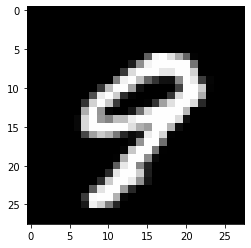

In [9]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

In [10]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 9
Ground truth is : 9


### visualize filters

In [11]:
model_children_list = list(model.children())
convolutional_layers = []
model_parameters = []
model_children_list

[Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)),
 Dropout2d(p=0.1, inplace=False),
 Dropout2d(p=0.25, inplace=False),
 Linear(in_features=4608, out_features=64, bias=True),
 Linear(in_features=64, out_features=10, bias=True)]

In [12]:
for i in range(len(model_children_list)):
    if type(model_children_list[i]) == nn.Conv2d:
        model_parameters.append(model_children_list[i].weight)
        convolutional_layers.append(model_children_list[i])

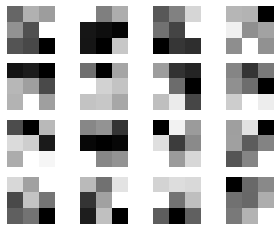

In [13]:
plt.figure(figsize=(5, 4))
for i, flt in enumerate(model_parameters[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(flt[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()

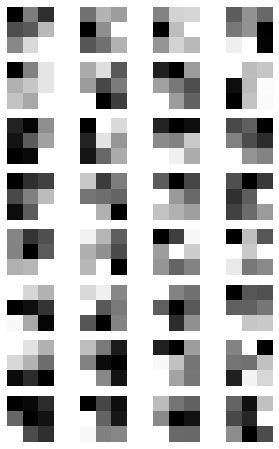

In [14]:
plt.figure(figsize=(5, 8))
for i, flt in enumerate(model_parameters[1]):
    plt.subplot(8, 4, i+1)
    plt.imshow(flt[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()

### visualize feature maps

In [15]:
per_layer_results = [convolutional_layers[0](sample_data)]
for i in range(1, len(convolutional_layers)):
    per_layer_results.append(convolutional_layers[i](per_layer_results[-1]))

torch.Size([16, 26, 26])


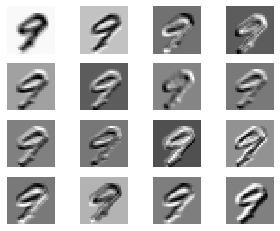

In [16]:
plt.figure(figsize=(5, 4))
layer_visualisation = per_layer_results[0][0, :, :, :]
layer_visualisation = layer_visualisation.data
print(layer_visualisation.size())
for i, flt in enumerate(layer_visualisation):
    plt.subplot(4, 4, i + 1)
    plt.imshow(flt, cmap='gray')
    plt.axis("off")
plt.show()

torch.Size([32, 24, 24])


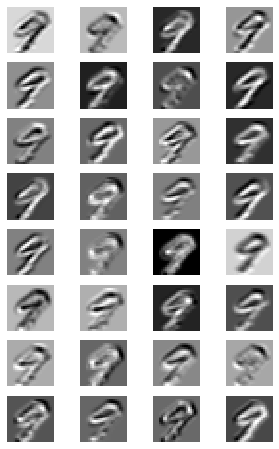

In [17]:
plt.figure(figsize=(5, 8))
layer_visualisation = per_layer_results[1][0, :, :, :]
layer_visualisation = layer_visualisation.data
print(layer_visualisation.size())
for i, flt in enumerate(layer_visualisation):
    plt.subplot(8, 4, i + 1)
    plt.imshow(flt, cmap='gray')
    plt.axis("off")
plt.show()